In [1]:
from manim import *

Manim Community v0.17.0

In [3]:
%%manim -ql SquareToCircle

class SquareToCircle(Scene):
    def construct(self):
        circle = Circle()
        square = Square()
        square.flip(RIGHT)
        square.rotate(-3 * TAU / 8)
        circle.set_fill(PINK, opacity=0.5)

        self.play(Create(square))
        self.play(Transform(square, circle))
        self.play(FadeOut(square))

                    INFO     Animation 0 : Using cached data (hash :                           ]8;id=754757;file://D:\QiuByte\venv\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=889869;file://D:\QiuByte\venv\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             4266129954_2571205894_223132457)                                                      

                    INFO     Animation 1 : Using cached data (hash :                           ]8;id=966927;file://D:\QiuByte\venv\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=107111;file://D:\QiuByte\venv\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             1380718205_3418135189_247722528)                                                      

                    INFO     Animation 2 : Using cached data (hash :                           ]8;id=195043;file://D:\QiuByte\venv\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=569257;file://D:\QiuByte\venv\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             1380718205_3203643330_247722528)                                                      

                    INFO     Combining to Movie file.                                      ]8;id=541811;file://D:\QiuByte\venv\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=258835;file://D:\QiuByte\venv\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=108055;file://D:\QiuByte\venv\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=693150;file://D:\QiuByte\venv\lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'D:\QiuByte\neural-nets-black-box\media\videos\neural-nets-bl                         
                             ack-box\480p15\SquareToCircle.mp4'                                                    
                                                                                                                   

                    INFO     Rendered SquareToCircle                                                   ]8;id=577842;file://D:\QiuByte\venv\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=955496;file://D:\QiuByte\venv\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 3 animations                                                                   

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use(['dark_background'])
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.labelleft'] = False

## Generating our dataset

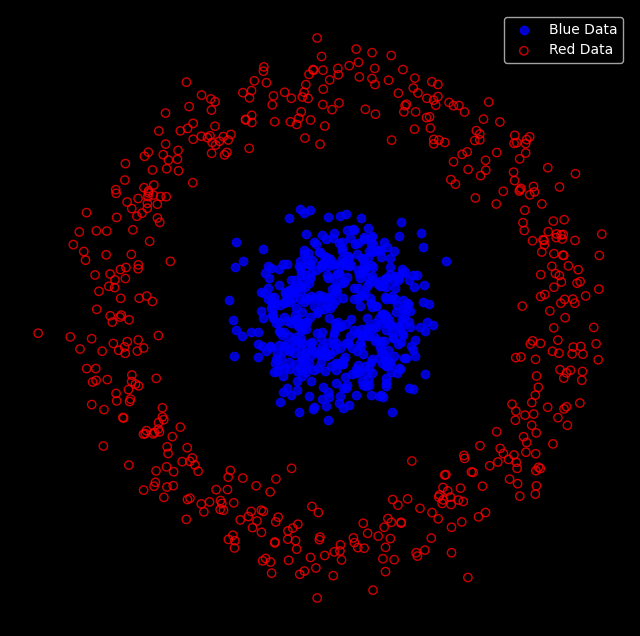

In [3]:
num_samples = 500
inner_radius = 1
outer_radius = 4
noise_level = 0.4

# Generate inner circle data with noise
theta_inner = np.linspace(0, 2*np.pi, num_samples)
x_inner = inner_radius * np.cos(theta_inner) + np.random.normal(0, noise_level, size=num_samples)
y_inner = inner_radius * np.sin(theta_inner) + np.random.normal(0, noise_level, size=num_samples)
labels_inner = np.zeros(num_samples)

# Generate outer circle data with noise
theta_outer = np.linspace(0, 2*np.pi, num_samples)
x_outer = outer_radius * np.cos(theta_outer) + np.random.normal(0, noise_level, size=num_samples)
y_outer = outer_radius * np.sin(theta_outer) + np.random.normal(0, noise_level, size=num_samples)
labels_outer = np.ones(num_samples)

# Concatenate data
X = np.concatenate([np.column_stack([x_inner, y_inner]), np.column_stack([x_outer, y_outer])])
y = np.concatenate([labels_inner, labels_outer])

# Plot the data
plt.figure(figsize=(8, 8))
plt.scatter(x_inner, y_inner, color='blue', label='Blue Data', alpha=0.8)
plt.scatter(x_outer, y_outer, facecolors='none', edgecolors='red', label='Red Data', alpha=0.8)
plt.legend()
plt.show()


## Neural Net and Training

In [4]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 4) 
        self.fc3 = nn.Linear(4, 1)
        self.relu = nn.ReLU()  # ReLU activation function

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # Sigmoid activation for binary classification
        return x

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [6]:
# Instantiate the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
# Training the model
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
with torch.no_grad():
    model.eval()
    predicted = model(X_test_tensor)
    predicted_labels = (predicted.squeeze() > 0.5).float()  # Convert probabilities to binary labels
    accuracy = (predicted_labels == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f'Test Accuracy: {accuracy:.2f}')

Epoch [100/1000], Loss: 0.6591
Epoch [200/1000], Loss: 0.5991
Epoch [300/1000], Loss: 0.4721
Epoch [400/1000], Loss: 0.3376
Epoch [500/1000], Loss: 0.2546
Epoch [600/1000], Loss: 0.2108
Epoch [700/1000], Loss: 0.1820
Epoch [800/1000], Loss: 0.1607
Epoch [900/1000], Loss: 0.1438
Epoch [1000/1000], Loss: 0.1291
Test Accuracy: 1.00


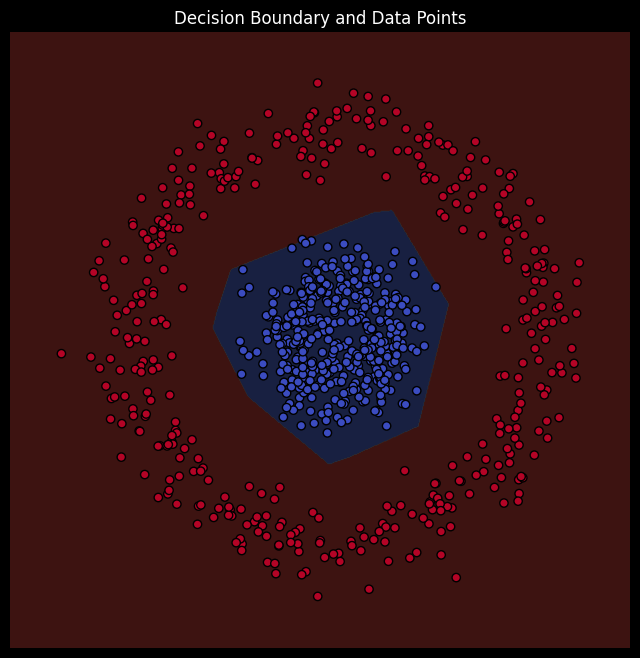

In [8]:
from sklearn.preprocessing import StandardScaler

# Function to create mesh grid
def create_meshgrid(X, h=.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


# Create mesh grid
xx, yy = create_meshgrid(X_train)

# Flatten the mesh grid points and predict their labels
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_tensor = torch.tensor(mesh_points, dtype=torch.float32)
with torch.no_grad():
    model.eval()
    preds = model(mesh_points_tensor)
    preds = (preds > 0.5).float().numpy().reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, preds, cmap=plt.cm.coolwarm, alpha=0.3, antialiased=True)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Decision Boundary and Data Points')
plt.show()

In [13]:
import os
import numpy as np
from manim import *
config.media_embed = True


# Train the neural network model
model = SimpleNN()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

outputs_over_epochs = []
num_epochs = 7
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()
    
    # Evaluate the model on the meshgrid
    with torch.no_grad():
        model.eval()
        outputs_meshgrid = model(mesh_points_tensor).numpy().reshape(xx.shape)
        outputs_over_epochs.append(outputs_meshgrid)

# Create a Manim scene to animate between the outputs
class NeuralNetAnimation(Scene):
    def construct(self):
        plots = [self.get_plot(output, epoch) for epoch, output in enumerate(outputs_over_epochs)]
        
        for i in range(len(plots) - 1):
            self.play(Transform(plots[i], plots[i+1]))

    def get_plot(self, output, epoch):
        title = Text(f'Epoch {epoch+1}', font_size=24).to_edge(UP)
        plot = self.get_plot_from_output(output)
        return Group(title, plot)

    def get_plot_from_output(self, output):
        image = ImageMobject(output).scale(5)
        return image

# Render the animation
if __name__ == "__main__":
    os.system("manim -pql my_animation.py NeuralNetAnimation")

## Generating heatmap of the output of each layer

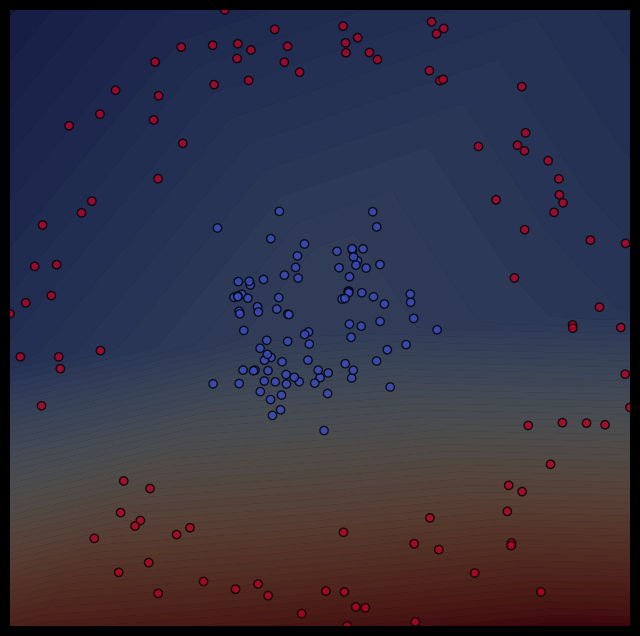

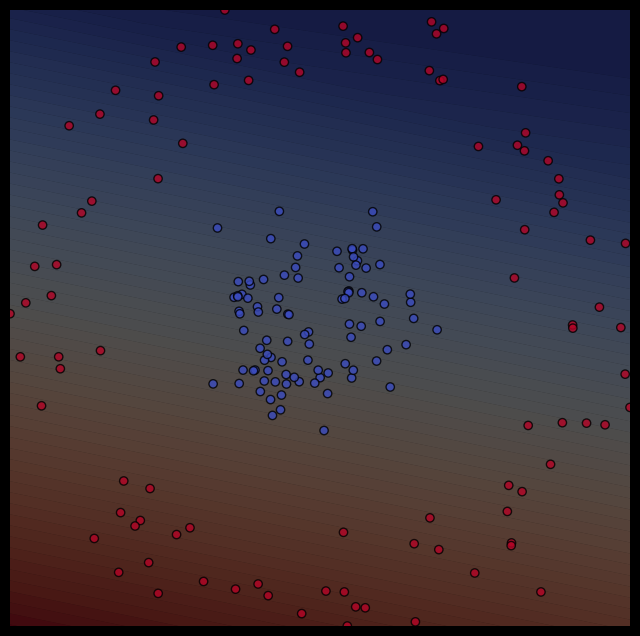

In [44]:
from sklearn.decomposition import PCA


def get_hidden_layer_output(model, layer_idx, input_data):
    """Function to get the output of a specific hidden layer in the model."""
    # Get all the layers in the model
    layers = list(model.children())
    
    # Iterate through the layers until the desired hidden layer
    for layer in layers[:layer_idx]:
        input_data = layer(input_data)
    
    # Return the output of the desired hidden layer
    output = input_data
    return output

# Create a meshgrid to cover the entire feature space
xx, yy = np.meshgrid(np.linspace(np.min(X_test[:, 0]), np.max(X_test[:, 0]), 100),
                     np.linspace(np.min(X_test[:, 1]), np.max(X_test[:, 1]), 100))

# Flatten and concatenate the mesh grid points
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Convert mesh points to tensor
mesh_points_tensor = torch.tensor(mesh_points, dtype=torch.float32)

# Iterate through each hidden layer
for i in range(2):
    # Create a new plot for each layer
    plt.figure(figsize=(8, 8))

    # Compute the output of the current hidden layer using the test data
    with torch.no_grad():
        model.eval()
        output = get_hidden_layer_output(model, i+1, X_test_tensor)

    # Apply ReLU activation function to the output
    output_relu = torch.relu(output)

    # Reduce the dimensionality of the output to 1 dimension
    pca = PCA(n_components=1)
    output_reduced = pca.fit_transform(output_relu.numpy())

    # Compute the output of the current hidden layer for mesh grid points
    with torch.no_grad():
        model.eval()
        hidden_output_mesh = get_hidden_layer_output(model, i+1, mesh_points_tensor)

    # Apply ReLU activation function to the output
    hidden_output_mesh_relu = torch.relu(hidden_output_mesh)

    # Reduce the dimensionality of the output to 1 dimension
    hidden_output_reduced = pca.transform(hidden_output_mesh_relu.numpy())

    # Reshape output to the shape of mesh grid
    output_grid = hidden_output_reduced.reshape(xx.shape)

    # Plot heatmap of the output of the current hidden layer
    plt.contourf(xx, yy, output_grid, cmap='coolwarm', alpha=0.35,levels=60, antialiased=True)

    # Plot dataset points
    plt.scatter(X_test[:, 0], X_test[:, 1], facecolors='none', edgecolors='black', c=y_test, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.show()